In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

## Reading data and EDA

In [2]:
df=pd.read_csv('Zoo.csv')

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df[df['animal name']=='wallaby']
df['type'].value_counts()
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

## Test Train splits and Grid searches with 2 methods

In [34]:
xTrain,xTest,yTrain,yTest=train_test_split(df.drop(['animal name','type'],axis=1),df.type)

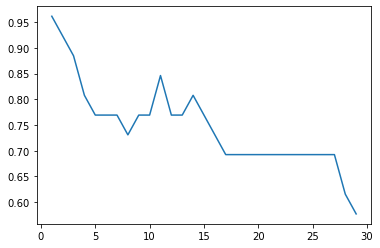

In [123]:
arr=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i,p=1).fit(xTrain,yTrain)
    arr.append(knn.score(xTest,yTest))
plt.plot(range(1,30),arr)

In [118]:
model = KNeighborsClassifier(p=1)
grid = GridSearchCV(cv=10,estimator=model, param_grid=dict(n_neighbors=np.array(range(1,40))))
grid.fit(xTrain,yTrain)

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=KNeighborsClassifier(p=1),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [119]:
print(grid.best_score_)
print(grid.best_params_)

0.9482142857142858
{'n_neighbors': 1}


## Fitting the algorithm with best N

In [114]:
knn=KNeighborsClassifier(n_neighbors=1,p=1).fit(xTrain,yTrain)

In [115]:
knn.predict(xTest)

array([1, 2, 2, 7, 4, 1, 1, 2, 5, 1, 3, 1, 6, 1, 2, 1, 7, 4, 6, 6, 6, 7,
       4, 7, 4, 2])

In [116]:
knn.score(xTest,yTest)

0.9615384615384616